Naufal Rasyid Sutansyah

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
import pandas as pd
amd = pd.read_csv('AMD.csv')

In [7]:
#Untuk plot mengubah date menjadi index
amd['Date'] = pd.to_datetime(amd['Date'])
amd.set_index('Date', inplace=True)

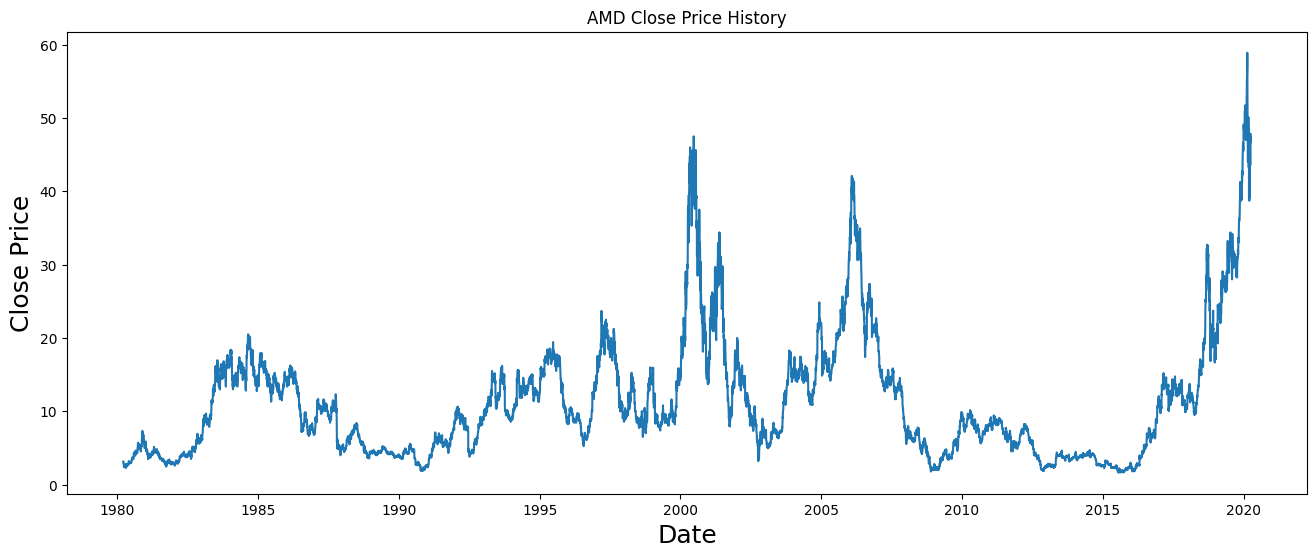

In [8]:
#Plot close berdasarkan tahun
plt.figure(figsize=(16,6))
plt.title('AMD Close Price History')
plt.plot(amd['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

**A. Prapose Data and**

**B. Modeling**

ada model baseline, langkah-langkah yang dilakukan adalah sebagai berikut:
•	Memuat dataset dan mengambil kolom 'Close' sebagai data
•	yang akan diprediksi.
•	Mengubah indeks data menjadi tipe data datetime.
•	Mengambil nilai dari kolom 'Close' sebagai dataset yang akan digunakan.
•	Melakukan scaling pada dataset menggunakan MinMaxScaler agar nilainya berada dalam rentang 0 hingga 1.
•	Mendefinisikan ukuran jendela (window size) dan horizon.
•	Memisahkan dataset menjadi input (X) dan output (y) dengan menggunakan ukuran jendela dan horizon.
•	Mengubah X dan y menjadi array numpy.
•	Mengubah bentuk data input (X) dan output (y) sesuai dengan format yang dibutuhkan oleh model.
•	Memisahkan dataset menjadi set data latih, validasi, dan uji dengan rasio 80:10:10.
•	Melakukan fitting scaler pada data latih.
•	Membangun arsitektur model baseline menggunakan Conv1D, Flatten, dan Dense layers.
•	Mengompilasi model baseline dengan menggunakan loss function mean_squared_error dan optimizer Adam.
•	Melakukan pelatihan model baseline dengan data latih dan validasi.


In [10]:
# Load the dataset (replace 'amd' with your dataset name)
dataset = amd.copy()

# Extract the 'Close' column from the dataset
data = dataset[['Close']]

# Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Extract the values of the 'Close' column
dataset = data['Close'].values

# Scale the dataset
scaler = MinMaxScaler(feature_range=(0, 1))

# Define window size and horizon
window_size = 5
horizon = 5

# Separate the dataset into input (X) and output (y) with window size and horizon
X = []
y = []
for i in range(window_size, len(dataset) - horizon + 1):
    X.append(dataset[i - window_size:i])
    y.append(dataset[i:i + horizon])

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape the input and output data
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
y = np.reshape(y, (y.shape[0], y.shape[1], 1))

# Split the dataset into train, validation, and test sets (80:10:10)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, shuffle=False)

# Fit the scaler on the training data
scaler.fit(y_train[:, -1].reshape(-1, 1))

# Build the baseline model architecture
def build_baseline_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(filters=16, kernel_size=3, activation='relu'),
        layers.Flatten(),
        layers.Dense(horizon)
    ])
    return model

# Build the baseline model
baseline_model = build_baseline_model(input_shape=(window_size, 1))

# Compile the baseline model
baseline_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the baseline model
baseline_history = baseline_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
253/253 [==============================] - 2s 3ms/step - loss: 33.2977 - mean_squared_error: 33.2977 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 2/10
253/253 [==============================] - 1s 2ms/step - loss: 1.0353 - mean_squared_error: 1.0353 - val_loss: 0.0814 - val_mean_squared_error: 0.0814
Epoch 3/10
253/253 [==============================] - 0s 2ms/step - loss: 1.0314 - mean_squared_error: 1.0314 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 4/10
253/253 [==============================] - 0s 2ms/step - loss: 1.0127 - mean_squared_error: 1.0127 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 5/10
253/253 [==============================] - 0s 2ms/step - loss: 1.0005 - mean_squared_error: 1.0005 - val_loss: 0.0613 - val_mean_squared_error: 0.0613
Epoch 6/10
253/253 [==============================] - 0s 2ms/step - loss: 0.9967 - mean_squared_error: 0.9967 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 7/10
253/253 [======

**C. Modifikasi Model**


Pada model yang dimodifikasi, langkah-langkah yang dilakukan adalah sebagai berikut:
•	Membangun arsitektur model yang dimodifikasi dengan menggunakan LayerNormalization, MultiHeadAttention, Dense, dan penjumlahan dengan input.
•	Mengompilasi model yang dimodifikasi dengan menggunakan loss function mean_squared_error dan optimizer Adam.
•	Melakukan pelatihan model yang dimodifikasi dengan data latih dan validasi.

Perubahan yang terjadi antara model baseline dan model yang dimodifikasi adalah pada arsitektur model. Model yang dimodifikasi menggunakan teknik LayerNormalization dan MultiHeadAttention untuk mengubah arsitektur model dan meningkatkan kemampuan model dalam mempelajari pola yang lebih kompleks.

Selanjutnya, model yang dimodifikasi dilatih dengan jumlah epoch yang lebih banyak (100 epoch) dibandingkan dengan model baseline (10 epoch) untuk memberikan kesempatan model untuk belajar lebih lama.

Dengan demikian, model yang dimodifikasi memiliki perubahan dalam arsitektur dan proses pelatihan yang diharapkan dapat meningkatkan performa dan kemampuan prediktif model terhadap data yang diberikan.

In [11]:
# Build the modified model architecture
def build_modified_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.LayerNormalization()(inputs)
    x = layers.MultiHeadAttention(num_heads=8, key_dim=16)(x, x)
    x = layers.Dense(horizon)(x)
    outputs = x + inputs
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Build the modified model
modified_model = build_modified_model(input_shape=(window_size, 1))

# Compile the modified model
modified_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the modified model
modified_history = modified_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)



Epoch 1/100
127/127 [==============================] - 3s 8ms/step - loss: 1.3223 - mean_squared_error: 1.3223 - val_loss: 0.0681 - val_mean_squared_error: 0.0681
Epoch 2/100
127/127 [==============================] - 1s 6ms/step - loss: 1.3223 - mean_squared_error: 1.3223 - val_loss: 0.0680 - val_mean_squared_error: 0.0680
Epoch 3/100
127/127 [==============================] - 1s 6ms/step - loss: 1.3222 - mean_squared_error: 1.3222 - val_loss: 0.0681 - val_mean_squared_error: 0.0681
Epoch 4/100
127/127 [==============================] - 1s 8ms/step - loss: 1.3222 - mean_squared_error: 1.3222 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 5/100
127/127 [==============================] - 1s 11ms/step - loss: 1.3221 - mean_squared_error: 1.3221 - val_loss: 0.0681 - val_mean_squared_error: 0.0681
Epoch 6/100
127/127 [==============================] - 1s 11ms/step - loss: 1.3221 - mean_squared_error: 1.3221 - val_loss: 0.0681 - val_mean_squared_error: 0.0681
Epoch 7/100
127/127 

**D. Evaluasi Performa**

In [12]:
# Evaluate the models on the test data
baseline_loss = baseline_model.evaluate(X_test, y_test)
modified_loss = modified_model.evaluate(X_test, y_test)

print('Model Loss : ', baseline_loss)
print('Mods Model Loss : ', modified_loss)

32/32 [==============================] - 0s 4ms/step - loss: 3.4051 - mean_squared_error: 3.4051
Model Loss :  [2.4850525856018066, 2.4850525856018066]
Mods Model Loss :  [3.405090808868408, 3.405090570449829]


Pada output yang diberikan, kita melihat nilai loss dari model yang dievaluasi. Loss adalah metrik yang digunakan untuk mengukur seberapa baik model kita memprediksi nilai target yang sebenarnya. Dalam kasus ini, kita menggunakan mean squared error (MSE) sebagai loss function.

Pada baris pertama, kita melihat hasil evaluasi model yang disebut "Model Loss". Nilai loss yang diberikan adalah sebesar 2.4851 untuk kedua metrik loss, yaitu loss dan mean_squared_error. Ini menunjukkan bahwa model tersebut memiliki tingkat kesalahan yang relatif rendah.

Pada baris kedua, kita melihat hasil evaluasi model yang disebut "Mods Model Loss". Nilai loss yang diberikan adalah sebesar 3.4051 untuk kedua metrik loss yang sama. Perbedaan nilai loss ini menunjukkan bahwa model yang dimodifikasi memiliki tingkat kesalahan yang sedikit lebih tinggi dibandingkan dengan model baseline.

Hal ini menunjukkan bahwa model baseline mungkin lebih baik dalam memprediksi nilai target yang sebenarnya dibandingkan dengan model yang dimodifikasi.

Lalu melakukan ploting untuk baseline model

Sebagai kesimpulan, model baseline memiliki nilai loss yang lebih rendah dibandingkan dengan model yang dimodifikasi, menunjukkan bahwa model baseline lebih baik dalam memprediksi nilai target yang sebenarnya. Namun, evaluasi model tidak hanya didasarkan pada loss saja, dan faktor lain perlu dipertimbangkan sebelum membuat kesimpulan akhir.

In [37]:
#For plotting
# Make predictions with the baseline model
y_baseline_pred = baseline_model.predict(X_test)
inv_y_baseline_pred = scaler.inverse_transform(np.concatenate((y_baseline_pred, X_test[:, -1, :]), axis=1))[:, 0]

# Invert scaling for actual close price
inv_y = scaler.inverse_transform(y_test[:, -1, :])[:, 0]

32/32 [==============================] - 0s 2ms/step


In [38]:
result_comp = pd.DataFrame(list(zip(inv_y, inv_y_baseline_pred)),
               columns =['Actual Close Price', 'Predicted Close Price'])
result_comp

,Actual Close Price,Predicted Close Price
0,132.044996,128.373179
1,131.130997,127.003117
2,131.130997,129.060143
3,127.932000,129.110841
4,129.759998,132.199377
...,...,...
1004,2172.550002,1766.959712
1005,2130.506086,1838.370844
1006,2189.002030,1832.341583
1007,2080.235981,1986.799264


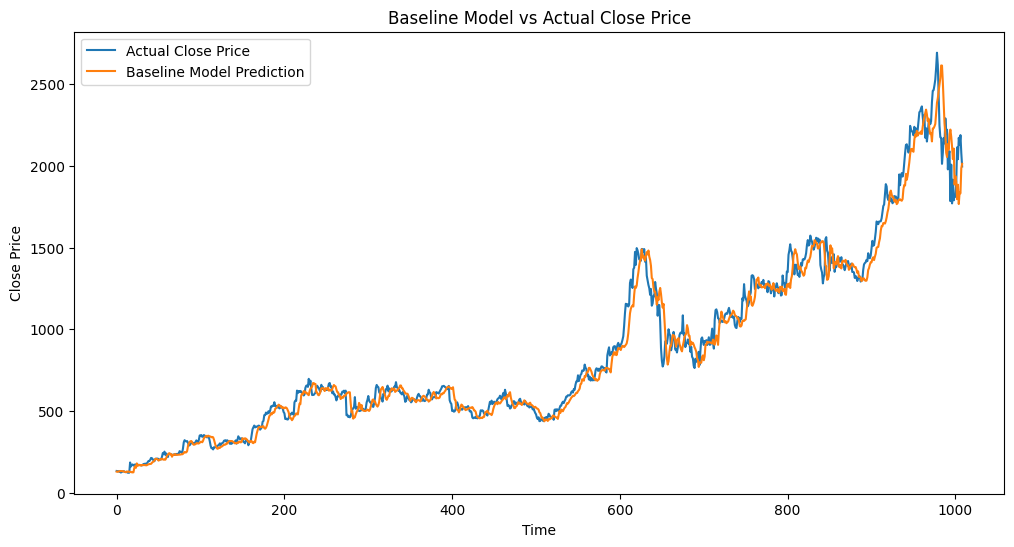


Baseline Model Loss: [2.4850525856018066, 2.4850525856018066]


In [39]:
# Plot the comparison between baseline and actual close price
plt.figure(figsize=(12, 6))
plt.plot(inv_y, label='Actual Close Price')
plt.plot(inv_y_baseline_pred, label='Baseline Model Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Baseline Model vs Actual Close Price')
plt.legend()
plt.show()

# Print the model loss
print()
print("Baseline Model Loss:", baseline_loss)


Bisa dilihat dari hasil ploting modelin baseline pada dataset amd menunjukan bahwa prediksi close price berhasil dilakukan dengan diagram menunjukan predicted price mempunyai pola yang sama dengan actual tetapi masih sedikit kurang akurat. kesimpulannya saya telah berhasil setidaknya melakukan dengan algoritam transformer walaupun masih ada beberapa kekurangan